# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
from collections import Counter

load_dotenv('apikeys.env')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sean\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\Sean\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


True

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!

api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!

newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_articles = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)
bitcoin_articles["totalResults"]

8467

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ethereum_articles = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

ethereum_articles["totalResults"]

1989

In [6]:




def create_sentiment(articles):
    crypto_sentiments = []

    for article in articles["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            crypto_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass
    sentiment_frame = pd.DataFrame(crypto_sentiments)
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    sentiment_frame = sentiment_frame[cols]
    return sentiment_frame







In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

bitcoin_sentiment= create_sentiment(bitcoin_articles)


bitcoin_sentiment['text'][0]

'Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]'

In [8]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

ethereum_sentiment= create_sentiment(ethereum_articles)

In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bitcoin_sentiment.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.00000
mean,0.233672,0.064389,0.011500,0.86850
std,0.345377,0.072475,0.035387,0.23038
min,-0.361200,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.85625
50%,0.051350,0.056000,0.000000,0.92650
75%,0.559650,0.108000,0.000000,1.00000
max,0.831600,0.246000,0.137000,1.00000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

ethereum_sentiment.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.237070,0.074700,0.019200,0.906100
std,0.370410,0.062607,0.043104,0.070778
min,-0.458800,0.000000,0.000000,0.754000
25%,0.000000,0.022500,0.000000,0.861750
50%,0.307100,0.073500,0.000000,0.915500
75%,0.473275,0.096500,0.000000,0.946750
max,0.831600,0.246000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score - but only slightly @ .0747 vs. .072475 for bitcoin

Q: Which coin had the highest compound score?

A: I assume you mean highest mean compound score here.  Ethereum is again slightly higher in this regard at .2370 vs. .2334.  However if you mean highest (max) compound score.  Ethereum has a .8316 max compound score while bitcoin had the exact same score.  I'm not sure how that happened. 

Q. Which coin had the highest positive score?

A: The coin that had the highest single (max) score is equal for both ethereum and bitcoin. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [13]:
# We need to create a large block of text from the corpus we've downloaded using the API
def raw_text(text_frame):
    list_of_articles = text_frame['text'].to_list()

    list_of_articles = " ".join(list_of_articles)

    return list_of_articles


bitcoin_raw = raw_text(bitcoin_sentiment)

ethereum_raw = raw_text(ethereum_sentiment)

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens




bitcoin_token_list = tokenizer(bitcoin_raw)
ethereum_token_list = tokenizer(ethereum_raw)

In [15]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_lematized_frame = pd.DataFrame(bitcoin_token_list)

bitcoin_lematized_frame.head()

,0
0,thing
1,best
2,left
3,mystery
4,least


In [16]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

ethereum_lematized_frame = pd.DataFrame(ethereum_token_list)

ethereum_lematized_frame.head()

,0
0,worried
1,geforce
2,rtx
3,sold
4,cryptocurrency


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

bitcoin_ngrams = ngrams(bitcoin_token_list, n=2)



In [19]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

ethereum_ngrams = ngrams(ethereum_token_list, n=2)

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    
    
    word_counts = Counter(tokens)
    return Counter(word_counts).most_common(N)




In [21]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

token_count(bitcoin_token_list,10)

# we ***could*** consider adding some of these to the stop words list as they probably aren't as helpful regarding our
# nlp analysis - I would do this as a follow up activity. 

[('char', 17),
 ('bitcoin', 10),
 ('ha', 9),
 ('reuters', 7),
 ('cryptocurrency', 5),
 ('exchange', 3),
 ('morning', 3),
 ('high', 3),
 ('investment', 3),
 ('new', 3)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

token_count(ethereum_token_list,10)

[('char', 20),
 ('reuters', 13),
 ('cryptocurrency', 9),
 ('bitcoin', 8),
 ('new', 7),
 ('ethereum', 7),
 ('ha', 6),
 ('week', 5),
 ('high', 5),
 ('token', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

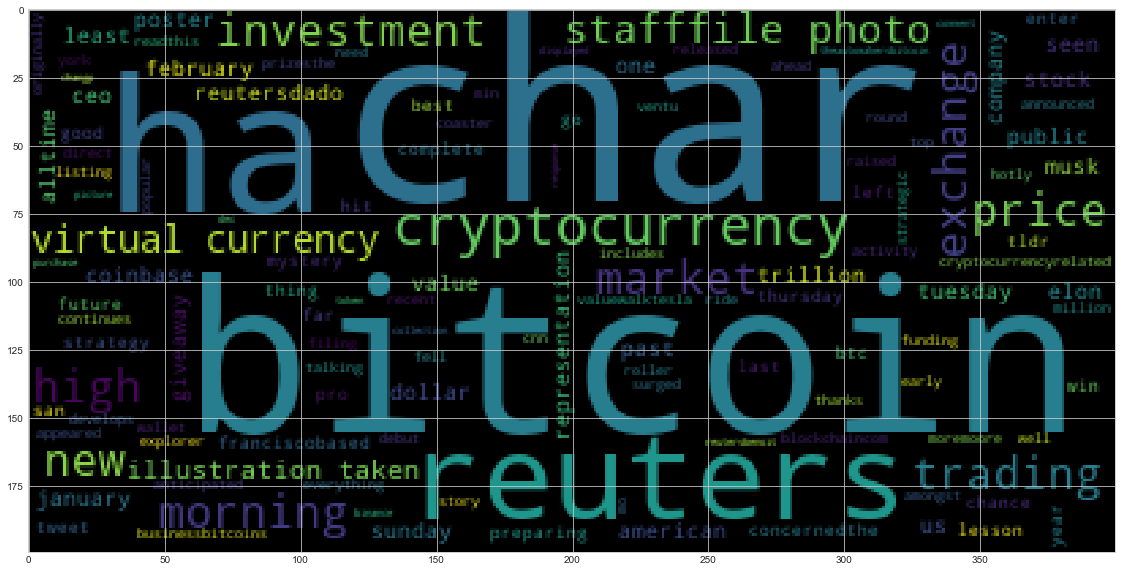

In [24]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

big_bitcoin_string = ' '.join(bitcoin_token_list)   

wc = WordCloud().generate(big_bitcoin_string)
plt.imshow(wc)

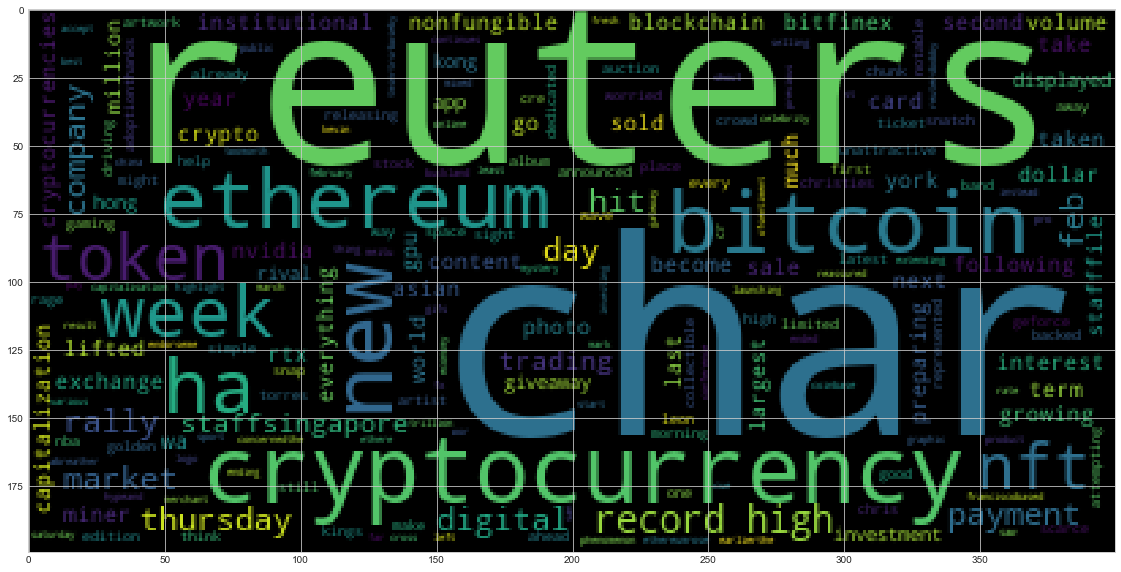

In [25]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

big_ethereum_string = ' '.join(ethereum_token_list)   

wc2 = WordCloud().generate(big_ethereum_string)
plt.imshow(wc2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy


In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

def raw_text(text_frame):
    list_of_articles = text_frame['text'].to_list()

    list_of_articles = " ".join(list_of_articles)

    return list_of_articles


bitcoin_raw = raw_text(bitcoin_sentiment)

ethereum_raw = raw_text(ethereum_sentiment)



In [30]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc = nlp(bitcoin_raw)

# Add a title to the document
# YOUR CODE HERE!


doc.user_data["title"] = "This is the way"


In [31]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent')

In [32]:
# List all Entities
# YOUR CODE HERE!

# Get geopolitical entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['San Francisco', 'New York', 'Binance', 'Changp', 'Pristina', 'Kosovo', 'HONG KONG', 'Bitcoin', 'U.S.']


---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

doc2 = nlp(ethereum_raw)

In [34]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc2 = nlp(ethereum_raw)

# Add a title to the document
# YOUR CODE HERE!

doc2.user_data["title"] = "This is the way too"


In [ ]:
# Render the visualization
# YOUR CODE HERE!

displacy.serve(doc2, style="ent")

C:\Users\Sean\anaconda3\envs\pyvizenv\lib\site-packages\spacy\displacy\__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...



In [ ]:
# List all Entities
# YOUR CODE HERE!

print([ent.text for ent in doc2.ents if ent.label_ == 'GPE'])

---